In [2]:
from MNISTDataset import MNISTDataset
from NeuralNetwork import NeuralNet
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
train_dataset = MNISTDataset(r"/home/noureldeen/Data/term 7/Intro to ML/Labs/ML_assignment2/archive/train-images.idx3-ubyte", r"/home/noureldeen/Data/term 7/Intro to ML/Labs/ML_assignment2/archive/train-labels.idx1-ubyte")
test_dataset = MNISTDataset(r"/home/noureldeen/Data/term 7/Intro to ML/Labs/ML_assignment2/archive/t10k-images.idx3-ubyte", r"/home/noureldeen/Data/term 7/Intro to ML/Labs/ML_assignment2/archive/t10k-labels.idx1-ubyte")
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

default_neurons = [128, 64]
learning_rates = [0.0001, 0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128, 256]
neurons = [[512, 256], [384, 192], [256, 128], [128, 64],
           [512, 256, 128], [384, 192, 96], [256, 128, 64], [128, 64, 32],
           [512, 256, 128, 64], [384, 192, 96, 48], [256, 128, 64, 32], [128, 64, 32, 16]
           [512, 256, 128, 64, 32], [384, 192, 96, 48, 24], [256, 128, 64, 32, 16], [128, 64, 32, 16, 8]
           ]

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1000, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

epochs = 10
mymodel = NeuralNet(default_neurons)
criterion =nn.CrossEntropyLoss()
optimize=torch.optim.SGD(mymodel.parameters(),lr=0.01)

best_lr_config = {"learning_rate": None, "val_accuracy": 0}
best_bs_config = {"batch_size": None, "val_accuracy": 0}
best_neurons_config = {"neurons": None, "val_accuracy": 0}

# Combined best configuration
combined_best_config = {"learning_rate": None, "batch_size": None, "neurons": None, "val_accuracy": 0}

In [4]:
def train_mymodel(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss, correct, total = 0, 0, 0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_accuracy = correct / total
        train_loss /= total

        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                val_total += labels.size(0)

        val_accuracy = val_correct / val_total
        val_loss /= val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    return train_losses, val_losses, train_accuracies, val_accuracies

In [5]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    accuracy = correct / total
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Test Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [6]:
def plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies):
    # Plotting the training and validation loss
    plt.figure(figsize=(12, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

Training with learning rate: 0.0001
Epoch 1/10
  Train Loss: 2.3074, Train Accuracy: 0.1432
  Val Loss: 2.3065, Val Accuracy: 0.1514
Epoch 2/10
  Train Loss: 2.3051, Train Accuracy: 0.1560
  Val Loss: 2.3042, Val Accuracy: 0.1631
Epoch 3/10
  Train Loss: 2.3028, Train Accuracy: 0.1691
  Val Loss: 2.3019, Val Accuracy: 0.1749
Epoch 4/10
  Train Loss: 2.3005, Train Accuracy: 0.1799
  Val Loss: 2.2996, Val Accuracy: 0.1846
Epoch 5/10
  Train Loss: 2.2983, Train Accuracy: 0.1892
  Val Loss: 2.2974, Val Accuracy: 0.1933
Epoch 6/10
  Train Loss: 2.2961, Train Accuracy: 0.1969
  Val Loss: 2.2952, Val Accuracy: 0.1996
Epoch 7/10
  Train Loss: 2.2939, Train Accuracy: 0.2032
  Val Loss: 2.2930, Val Accuracy: 0.2056
Epoch 8/10
  Train Loss: 2.2917, Train Accuracy: 0.2074
  Val Loss: 2.2908, Val Accuracy: 0.2087
Epoch 9/10
  Train Loss: 2.2895, Train Accuracy: 0.2114
  Val Loss: 2.2886, Val Accuracy: 0.2129
Epoch 10/10
  Train Loss: 2.2873, Train Accuracy: 0.2152
  Val Loss: 2.2864, Val Accuracy: 

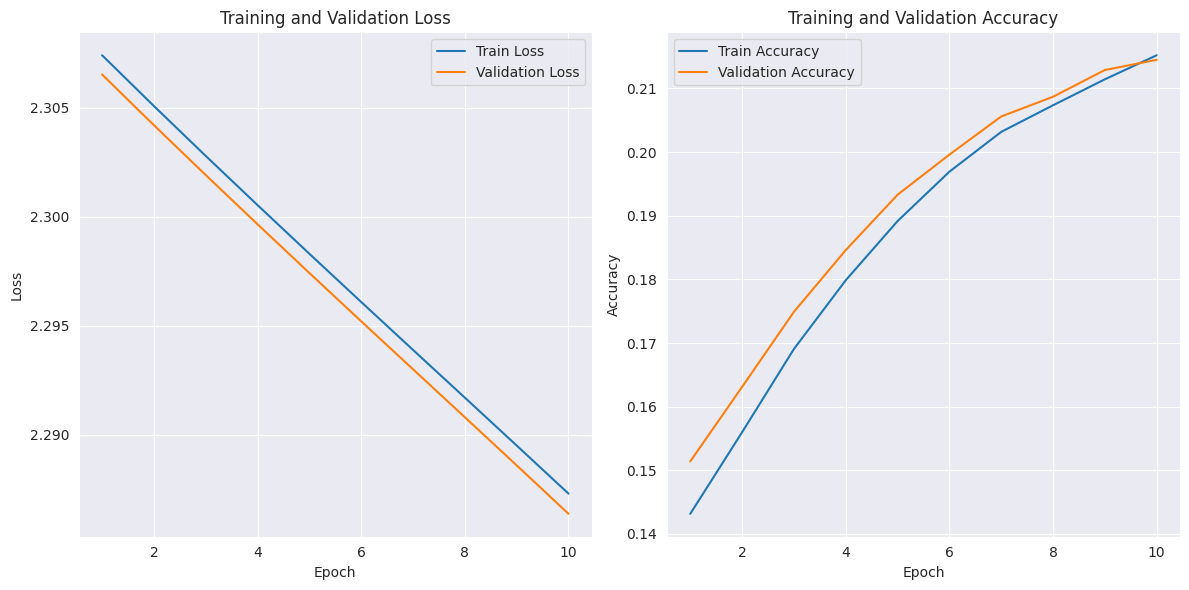

Training with learning rate: 0.001
Epoch 1/10
  Train Loss: 2.2940, Train Accuracy: 0.1756
  Val Loss: 2.2855, Val Accuracy: 0.2054
Epoch 2/10
  Train Loss: 2.2732, Train Accuracy: 0.2334
  Val Loss: 2.2610, Val Accuracy: 0.2580
Epoch 3/10
  Train Loss: 2.2432, Train Accuracy: 0.3266
  Val Loss: 2.2237, Val Accuracy: 0.3867
Epoch 4/10
  Train Loss: 2.1960, Train Accuracy: 0.4485
  Val Loss: 2.1646, Val Accuracy: 0.4897
Epoch 5/10
  Train Loss: 2.1219, Train Accuracy: 0.5294
  Val Loss: 2.0732, Val Accuracy: 0.5494
Epoch 6/10
  Train Loss: 2.0094, Train Accuracy: 0.5812
  Val Loss: 1.9381, Val Accuracy: 0.5977
Epoch 7/10
  Train Loss: 1.8500, Train Accuracy: 0.6249
  Val Loss: 1.7532, Val Accuracy: 0.6485
Epoch 8/10
  Train Loss: 1.6422, Train Accuracy: 0.6613
  Val Loss: 1.5244, Val Accuracy: 0.6780
Epoch 9/10
  Train Loss: 1.4065, Train Accuracy: 0.6963
  Val Loss: 1.2878, Val Accuracy: 0.7160
Epoch 10/10
  Train Loss: 1.1878, Train Accuracy: 0.7322
  Val Loss: 1.0899, Val Accuracy: 0

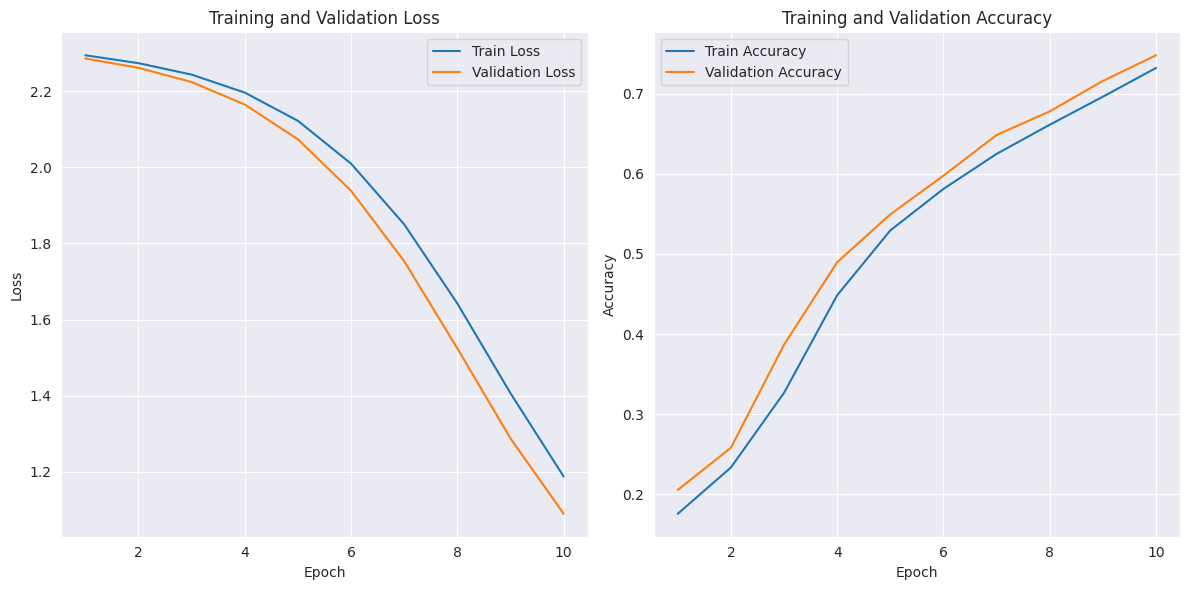

Training with learning rate: 0.01
Epoch 1/10
  Train Loss: 1.9024, Train Accuracy: 0.4677
  Val Loss: 1.0760, Val Accuracy: 0.7654
Epoch 2/10
  Train Loss: 0.6963, Train Accuracy: 0.8245
  Val Loss: 0.5106, Val Accuracy: 0.8611
Epoch 3/10
  Train Loss: 0.4434, Train Accuracy: 0.8768
  Val Loss: 0.4073, Val Accuracy: 0.8852
Epoch 4/10
  Train Loss: 0.3720, Train Accuracy: 0.8948
  Val Loss: 0.3659, Val Accuracy: 0.8945
Epoch 5/10
  Train Loss: 0.3364, Train Accuracy: 0.9041
  Val Loss: 0.3335, Val Accuracy: 0.9022
Epoch 6/10
  Train Loss: 0.3119, Train Accuracy: 0.9108
  Val Loss: 0.3141, Val Accuracy: 0.9068
Epoch 7/10
  Train Loss: 0.2931, Train Accuracy: 0.9158
  Val Loss: 0.2980, Val Accuracy: 0.9134
Epoch 8/10
  Train Loss: 0.2770, Train Accuracy: 0.9206
  Val Loss: 0.2841, Val Accuracy: 0.9165
Epoch 9/10
  Train Loss: 0.2625, Train Accuracy: 0.9246
  Val Loss: 0.2694, Val Accuracy: 0.9200
Epoch 10/10
  Train Loss: 0.2494, Train Accuracy: 0.9283
  Val Loss: 0.2588, Val Accuracy: 0.

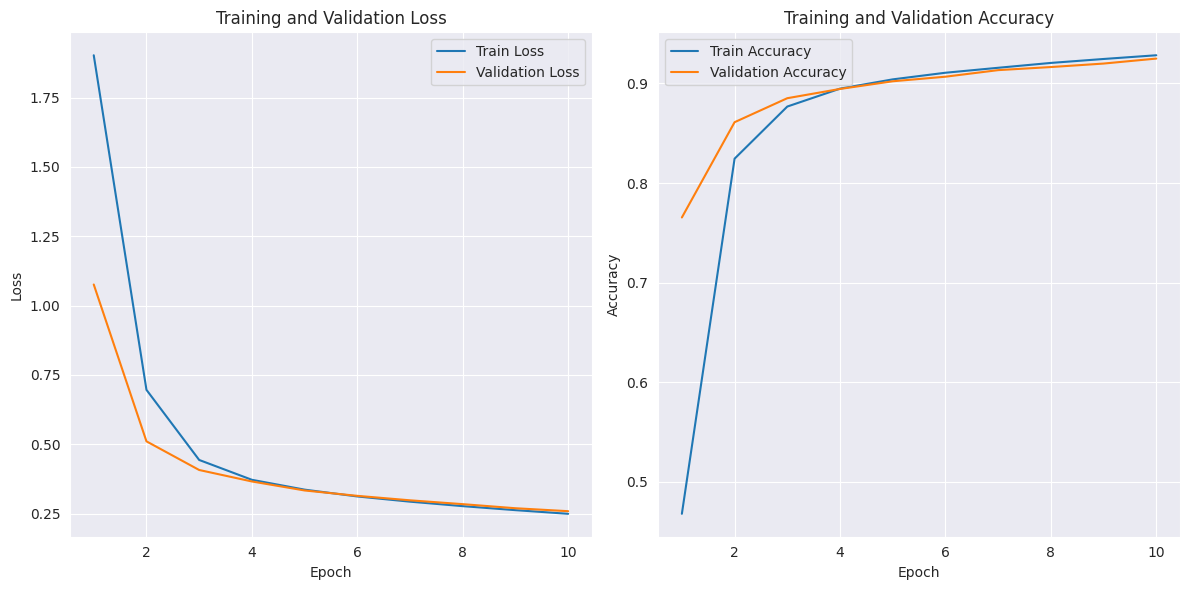

Training with learning rate: 0.1
Epoch 1/10
  Train Loss: 0.5586, Train Accuracy: 0.8394
  Val Loss: 0.3370, Val Accuracy: 0.8989
Epoch 2/10
  Train Loss: 0.2177, Train Accuracy: 0.9362
  Val Loss: 0.1970, Val Accuracy: 0.9385
Epoch 3/10
  Train Loss: 0.1508, Train Accuracy: 0.9558
  Val Loss: 0.1713, Val Accuracy: 0.9476
Epoch 4/10
  Train Loss: 0.1129, Train Accuracy: 0.9664
  Val Loss: 0.1258, Val Accuracy: 0.9612
Epoch 5/10
  Train Loss: 0.0914, Train Accuracy: 0.9728
  Val Loss: 0.1146, Val Accuracy: 0.9640
Epoch 6/10
  Train Loss: 0.0750, Train Accuracy: 0.9777
  Val Loss: 0.1880, Val Accuracy: 0.9449
Epoch 7/10
  Train Loss: 0.0630, Train Accuracy: 0.9808
  Val Loss: 0.1124, Val Accuracy: 0.9671
Epoch 8/10
  Train Loss: 0.0538, Train Accuracy: 0.9847
  Val Loss: 0.0914, Val Accuracy: 0.9714
Epoch 9/10
  Train Loss: 0.0448, Train Accuracy: 0.9873
  Val Loss: 0.0987, Val Accuracy: 0.9717
Epoch 10/10
  Train Loss: 0.0393, Train Accuracy: 0.9885
  Val Loss: 0.0906, Val Accuracy: 0.9

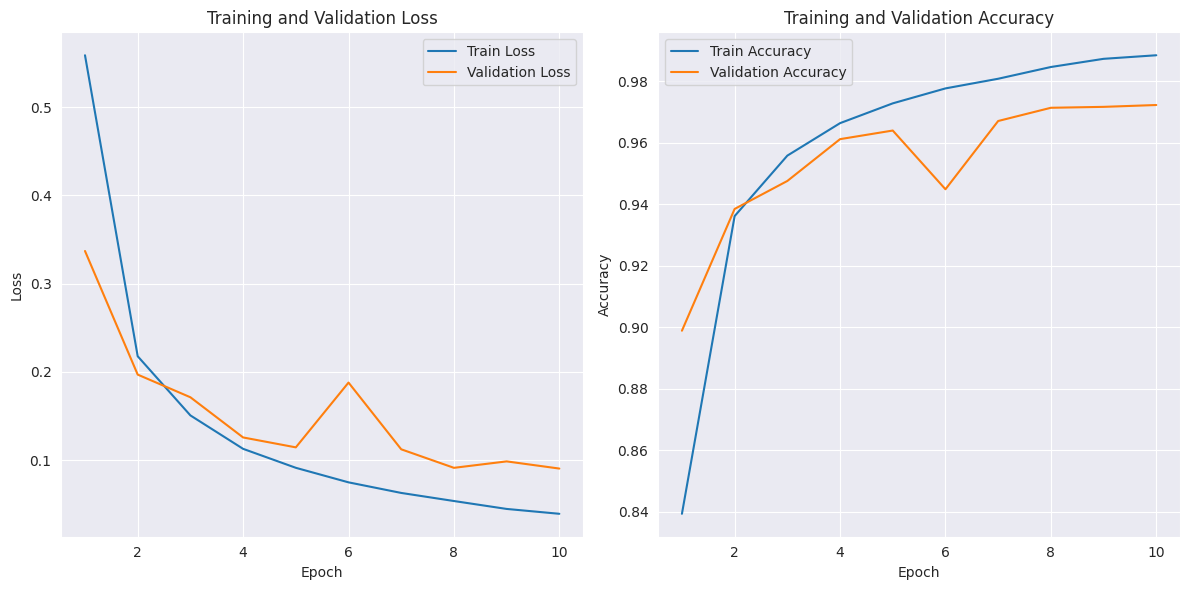

In [7]:
for lr in learning_rates:
    mymodel = NeuralNet(default_neurons)
    criterion =nn.CrossEntropyLoss()
    print(f"Training with learning rate: {lr}")
    optimizer = torch.optim.SGD(mymodel.parameters(), lr=lr)
    train_losses, val_losses, train_accuracies, val_accuracies = train_mymodel(mymodel, train_loader, val_loader, criterion, optimizer, epochs)
    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)
    
    max_val_accuracy = max(val_accuracies)
    
    # Update the best learning rate configuration
    if max_val_accuracy > best_lr_config["val_accuracy"]:
        best_lr_config.update({"learning_rate": lr, "val_accuracy": max_val_accuracy})
    if max_val_accuracy > combined_best_config["val_accuracy"]:
        combined_best_config.update({"learning_rate": lr, "batch_size": 64, "neurons": default_neurons, "val_accuracy": max(val_accuracies)})

Training with batch size: 32
Epoch 1/10
  Train Loss: 1.2902, Train Accuracy: 0.6247
  Val Loss: 0.5145, Val Accuracy: 0.8600
Epoch 2/10
  Train Loss: 0.4094, Train Accuracy: 0.8853
  Val Loss: 0.3575, Val Accuracy: 0.8956
Epoch 3/10
  Train Loss: 0.3244, Train Accuracy: 0.9065
  Val Loss: 0.3108, Val Accuracy: 0.9105
Epoch 4/10
  Train Loss: 0.2853, Train Accuracy: 0.9183
  Val Loss: 0.2811, Val Accuracy: 0.9190
Epoch 5/10
  Train Loss: 0.2571, Train Accuracy: 0.9258
  Val Loss: 0.2584, Val Accuracy: 0.9241
Epoch 6/10
  Train Loss: 0.2341, Train Accuracy: 0.9329
  Val Loss: 0.2402, Val Accuracy: 0.9316
Epoch 7/10
  Train Loss: 0.2144, Train Accuracy: 0.9387
  Val Loss: 0.2200, Val Accuracy: 0.9361
Epoch 8/10
  Train Loss: 0.1977, Train Accuracy: 0.9434
  Val Loss: 0.2061, Val Accuracy: 0.9396
Epoch 9/10
  Train Loss: 0.1822, Train Accuracy: 0.9475
  Val Loss: 0.1960, Val Accuracy: 0.9409
Epoch 10/10
  Train Loss: 0.1683, Train Accuracy: 0.9520
  Val Loss: 0.1842, Val Accuracy: 0.9459


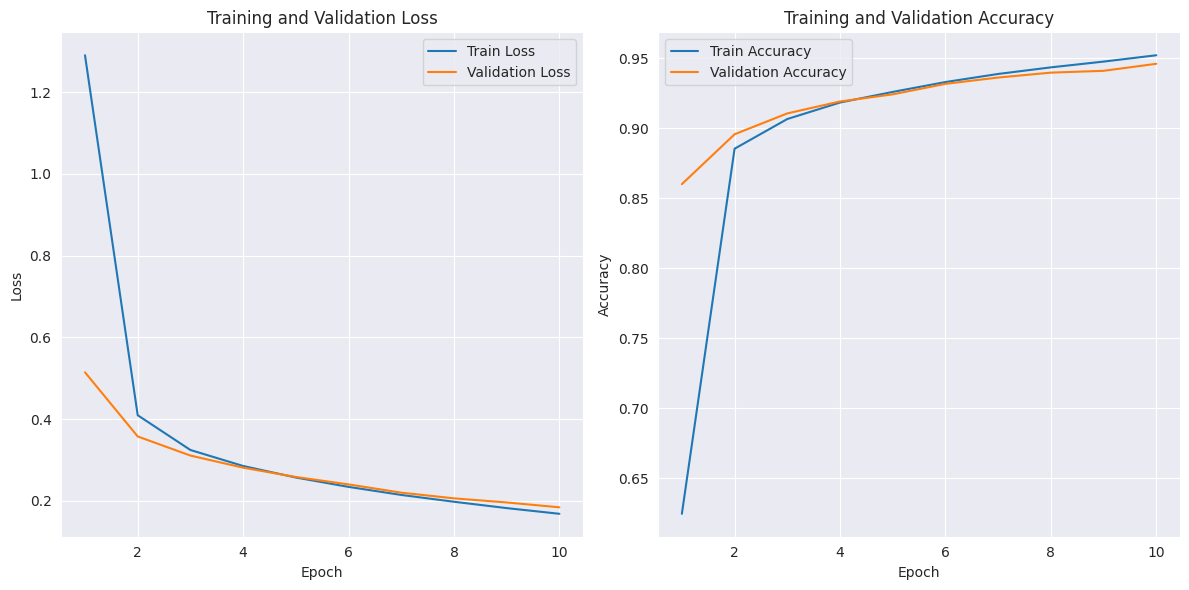

Training with batch size: 64
Epoch 1/10
  Train Loss: 1.9870, Train Accuracy: 0.4830
  Val Loss: 1.2226, Val Accuracy: 0.7437
Epoch 2/10
  Train Loss: 0.7386, Train Accuracy: 0.8169
  Val Loss: 0.5172, Val Accuracy: 0.8622
Epoch 3/10
  Train Loss: 0.4512, Train Accuracy: 0.8753
  Val Loss: 0.4134, Val Accuracy: 0.8825
Epoch 4/10
  Train Loss: 0.3797, Train Accuracy: 0.8927
  Val Loss: 0.3675, Val Accuracy: 0.8952
Epoch 5/10
  Train Loss: 0.3438, Train Accuracy: 0.9031
  Val Loss: 0.3443, Val Accuracy: 0.9002
Epoch 6/10
  Train Loss: 0.3198, Train Accuracy: 0.9090
  Val Loss: 0.3214, Val Accuracy: 0.9060
Epoch 7/10
  Train Loss: 0.3018, Train Accuracy: 0.9148
  Val Loss: 0.3088, Val Accuracy: 0.9111
Epoch 8/10
  Train Loss: 0.2855, Train Accuracy: 0.9182
  Val Loss: 0.2981, Val Accuracy: 0.9131
Epoch 9/10
  Train Loss: 0.2714, Train Accuracy: 0.9225
  Val Loss: 0.2794, Val Accuracy: 0.9186
Epoch 10/10
  Train Loss: 0.2583, Train Accuracy: 0.9259
  Val Loss: 0.2694, Val Accuracy: 0.9227


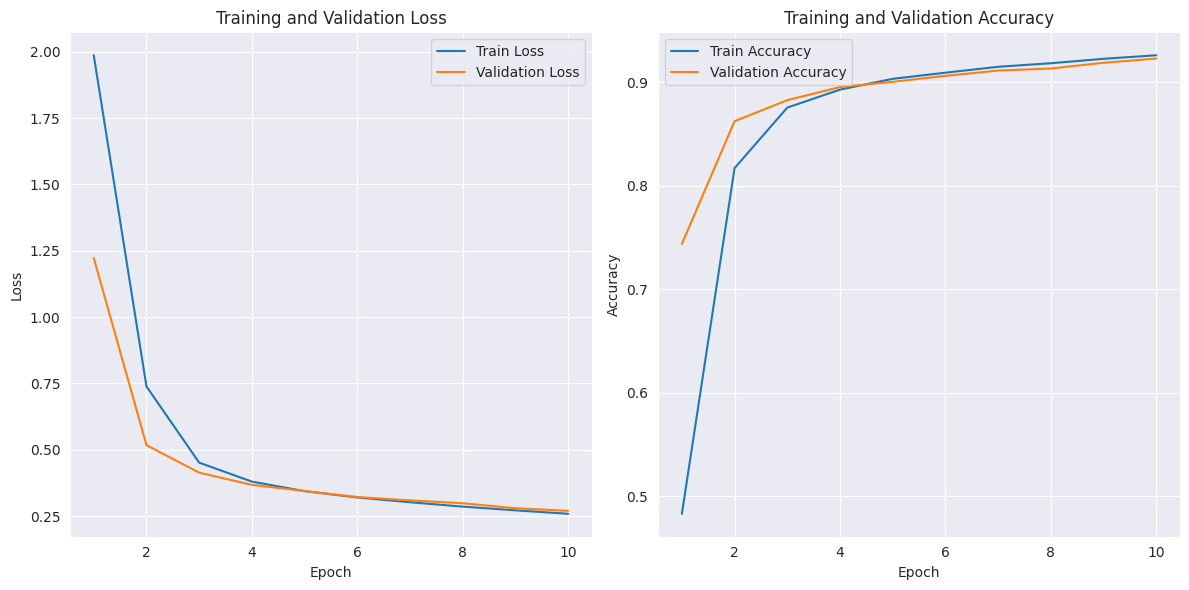

Training with batch size: 128
Epoch 1/10
  Train Loss: 2.2255, Train Accuracy: 0.3491
  Val Loss: 2.0773, Val Accuracy: 0.5434
Epoch 2/10
  Train Loss: 1.6530, Train Accuracy: 0.6551
  Val Loss: 1.1230, Val Accuracy: 0.7549
Epoch 3/10
  Train Loss: 0.8243, Train Accuracy: 0.8031
  Val Loss: 0.6356, Val Accuracy: 0.8384
Epoch 4/10
  Train Loss: 0.5605, Train Accuracy: 0.8495
  Val Loss: 0.5044, Val Accuracy: 0.8597
Epoch 5/10
  Train Loss: 0.4676, Train Accuracy: 0.8697
  Val Loss: 0.4409, Val Accuracy: 0.8775
Epoch 6/10
  Train Loss: 0.4175, Train Accuracy: 0.8826
  Val Loss: 0.4054, Val Accuracy: 0.8869
Epoch 7/10
  Train Loss: 0.3850, Train Accuracy: 0.8912
  Val Loss: 0.3806, Val Accuracy: 0.8912
Epoch 8/10
  Train Loss: 0.3618, Train Accuracy: 0.8974
  Val Loss: 0.3626, Val Accuracy: 0.8960
Epoch 9/10
  Train Loss: 0.3440, Train Accuracy: 0.9015
  Val Loss: 0.3464, Val Accuracy: 0.9008
Epoch 10/10
  Train Loss: 0.3291, Train Accuracy: 0.9063
  Val Loss: 0.3343, Val Accuracy: 0.9036

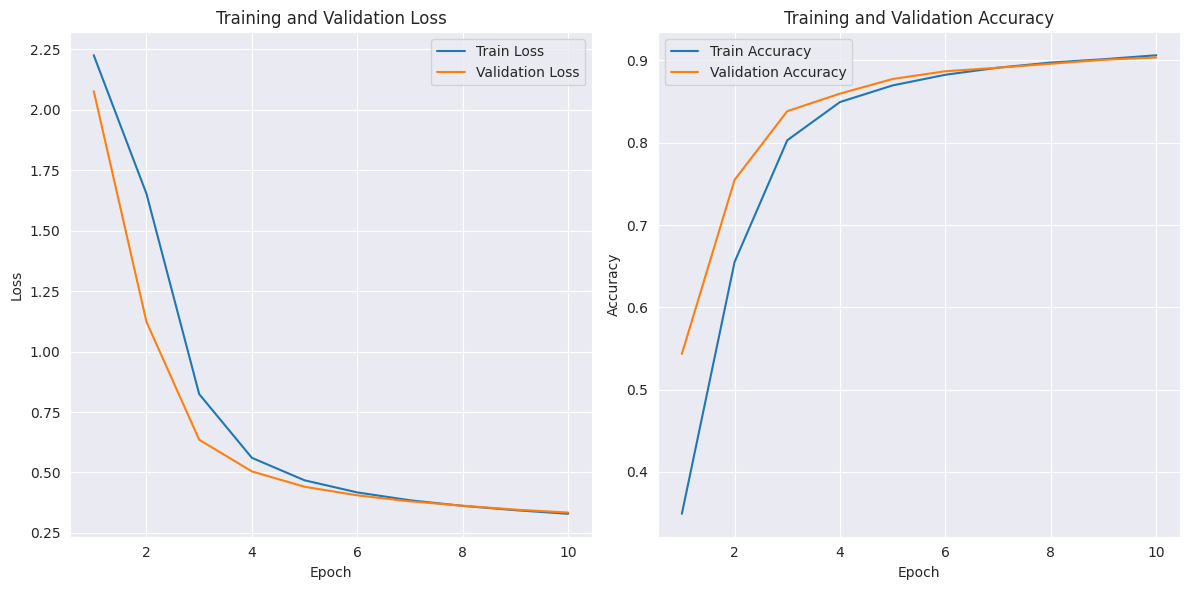

Training with batch size: 256
Epoch 1/10
  Train Loss: 2.2733, Train Accuracy: 0.2407
  Val Loss: 2.2298, Val Accuracy: 0.4055
Epoch 2/10
  Train Loss: 2.1544, Train Accuracy: 0.5209
  Val Loss: 2.0404, Val Accuracy: 0.6259
Epoch 3/10
  Train Loss: 1.8462, Train Accuracy: 0.6701
  Val Loss: 1.5902, Val Accuracy: 0.6985
Epoch 4/10
  Train Loss: 1.3114, Train Accuracy: 0.7346
  Val Loss: 1.0472, Val Accuracy: 0.7714
Epoch 5/10
  Train Loss: 0.8991, Train Accuracy: 0.7897
  Val Loss: 0.7701, Val Accuracy: 0.8097
Epoch 6/10
  Train Loss: 0.7030, Train Accuracy: 0.8198
  Val Loss: 0.6358, Val Accuracy: 0.8353
Epoch 7/10
  Train Loss: 0.5985, Train Accuracy: 0.8394
  Val Loss: 0.5572, Val Accuracy: 0.8515
Epoch 8/10
  Train Loss: 0.5332, Train Accuracy: 0.8537
  Val Loss: 0.5059, Val Accuracy: 0.8627
Epoch 9/10
  Train Loss: 0.4878, Train Accuracy: 0.8649
  Val Loss: 0.4686, Val Accuracy: 0.8724
Epoch 10/10
  Train Loss: 0.4544, Train Accuracy: 0.8734
  Val Loss: 0.4412, Val Accuracy: 0.8789

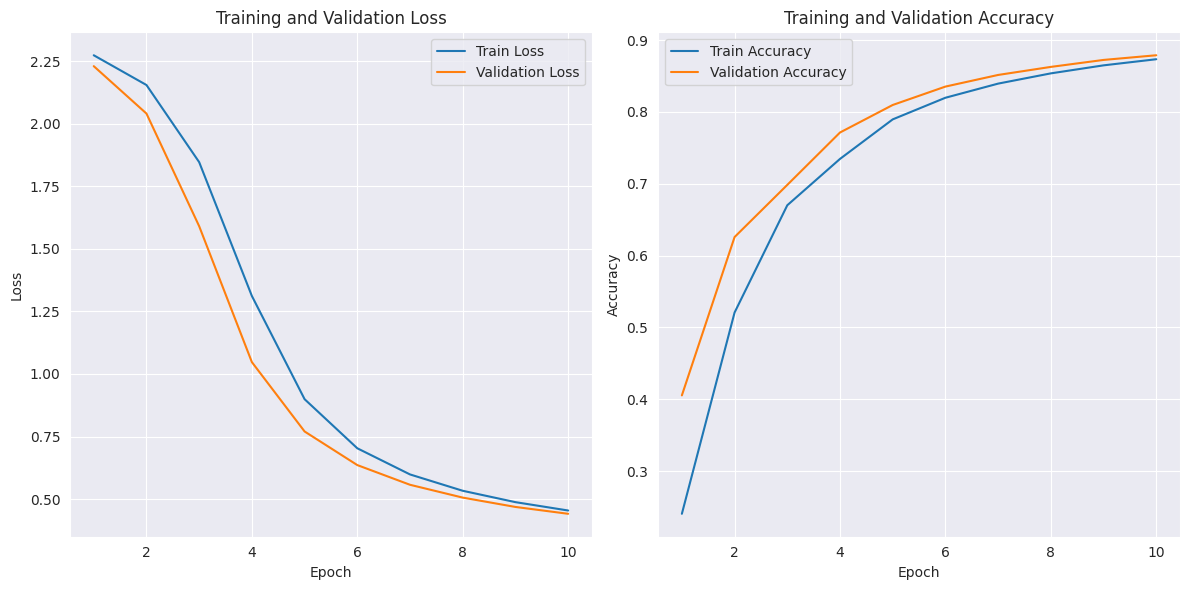

In [8]:
for bs in batch_sizes:
    mymodel = NeuralNet(default_neurons)
    criterion =nn.CrossEntropyLoss()
    optimize=torch.optim.SGD(mymodel.parameters(),lr=0.01)
    print(f"Training with batch size: {bs}")
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    train_losses, val_losses, train_accuracies, val_accuracies = train_mymodel(mymodel, train_loader, val_loader, criterion, optimize, epochs)
    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)
    
    max_val_accuracy = max(val_accuracies)
    
    # Update the best batch size configuration
    if max_val_accuracy > best_bs_config["val_accuracy"]:
        best_bs_config.update({"batch_size": bs, "val_accuracy": max_val_accuracy})
    if max_val_accuracy > combined_best_config["val_accuracy"]:
        combined_best_config.update({"learning_rate": 0.01, "batch_size": bs, "neurons": default_neurons, "val_accuracy": max(val_accuracies)})

Training with hidden layer: 2 with values: [64, 32]
Epoch 1/10
  Train Loss: 2.2776, Train Accuracy: 0.1281
  Val Loss: 2.2361, Val Accuracy: 0.3426
Epoch 2/10
  Train Loss: 2.1600, Train Accuracy: 0.4685
  Val Loss: 2.0462, Val Accuracy: 0.5022
Epoch 3/10
  Train Loss: 1.8532, Train Accuracy: 0.5249
  Val Loss: 1.6105, Val Accuracy: 0.5451
Epoch 4/10
  Train Loss: 1.3789, Train Accuracy: 0.6170
  Val Loss: 1.1581, Val Accuracy: 0.6868
Epoch 5/10
  Train Loss: 1.0103, Train Accuracy: 0.7305
  Val Loss: 0.8774, Val Accuracy: 0.7657
Epoch 6/10
  Train Loss: 0.7895, Train Accuracy: 0.7832
  Val Loss: 0.7086, Val Accuracy: 0.8006
Epoch 7/10
  Train Loss: 0.6608, Train Accuracy: 0.8116
  Val Loss: 0.6118, Val Accuracy: 0.8225
Epoch 8/10
  Train Loss: 0.5836, Train Accuracy: 0.8308
  Val Loss: 0.5520, Val Accuracy: 0.8413
Epoch 9/10
  Train Loss: 0.5323, Train Accuracy: 0.8448
  Val Loss: 0.5103, Val Accuracy: 0.8538
Epoch 10/10
  Train Loss: 0.4945, Train Accuracy: 0.8575
  Val Loss: 0.4775

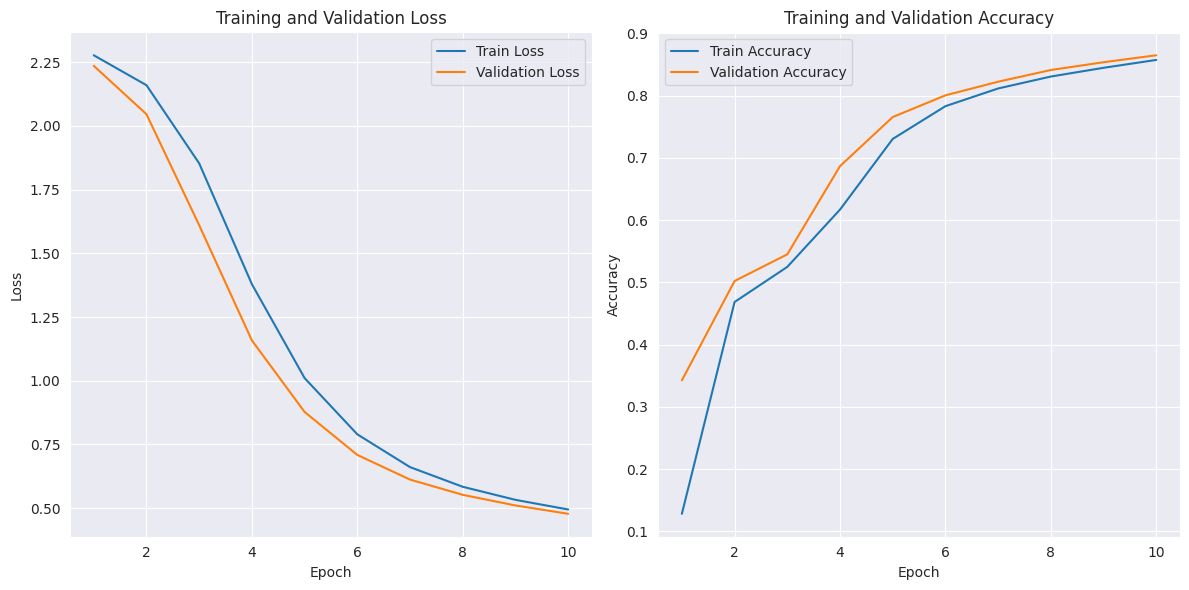

Training with hidden layer: 2 with values: [128, 64]
Epoch 1/10
  Train Loss: 2.2714, Train Accuracy: 0.1866
  Val Loss: 2.2272, Val Accuracy: 0.2936
Epoch 2/10
  Train Loss: 2.1406, Train Accuracy: 0.4448
  Val Loss: 2.0163, Val Accuracy: 0.5610
Epoch 3/10
  Train Loss: 1.8059, Train Accuracy: 0.6271
  Val Loss: 1.5507, Val Accuracy: 0.7021
Epoch 4/10
  Train Loss: 1.2974, Train Accuracy: 0.7332
  Val Loss: 1.0676, Val Accuracy: 0.7656
Epoch 5/10
  Train Loss: 0.9203, Train Accuracy: 0.7844
  Val Loss: 0.7944, Val Accuracy: 0.8001
Epoch 6/10
  Train Loss: 0.7175, Train Accuracy: 0.8180
  Val Loss: 0.6467, Val Accuracy: 0.8338
Epoch 7/10
  Train Loss: 0.6037, Train Accuracy: 0.8414
  Val Loss: 0.5617, Val Accuracy: 0.8520
Epoch 8/10
  Train Loss: 0.5336, Train Accuracy: 0.8564
  Val Loss: 0.5066, Val Accuracy: 0.8661
Epoch 9/10
  Train Loss: 0.4867, Train Accuracy: 0.8681
  Val Loss: 0.4697, Val Accuracy: 0.8730
Epoch 10/10
  Train Loss: 0.4533, Train Accuracy: 0.8760
  Val Loss: 0.441

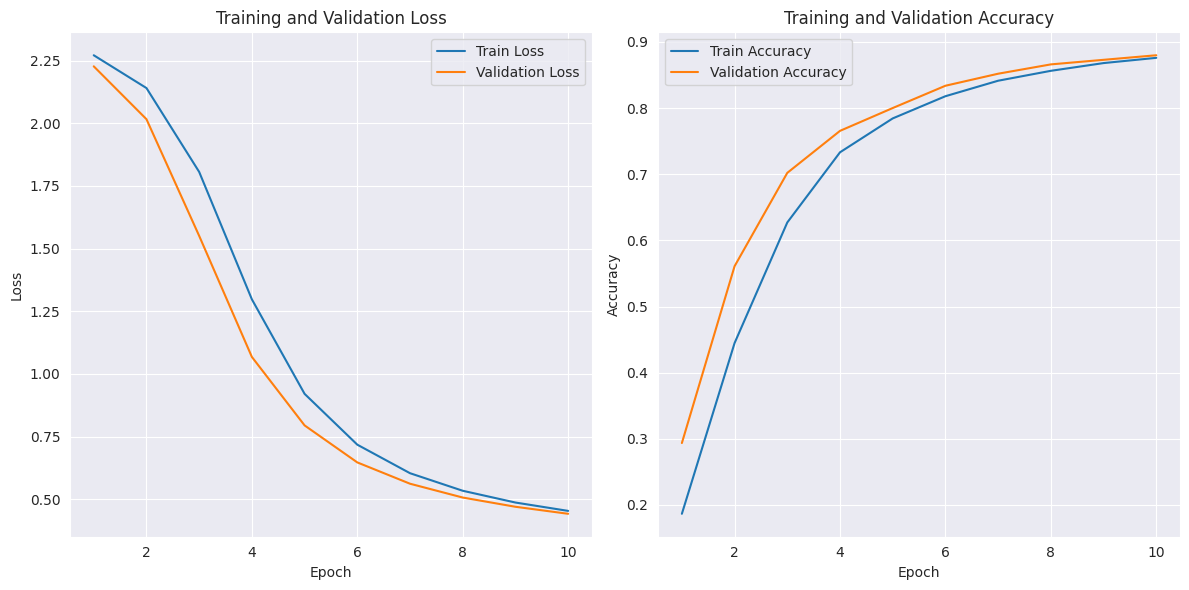

Training with hidden layer: 3 with values: [256, 128, 64]
Epoch 1/10
  Train Loss: 2.2961, Train Accuracy: 0.1720
  Val Loss: 2.2897, Val Accuracy: 0.2914
Epoch 2/10
  Train Loss: 2.2811, Train Accuracy: 0.3329
  Val Loss: 2.2697, Val Accuracy: 0.3758
Epoch 3/10
  Train Loss: 2.2505, Train Accuracy: 0.3706
  Val Loss: 2.2230, Val Accuracy: 0.3703
Epoch 4/10
  Train Loss: 2.1746, Train Accuracy: 0.3645
  Val Loss: 2.1051, Val Accuracy: 0.3942
Epoch 5/10
  Train Loss: 1.9888, Train Accuracy: 0.4379
  Val Loss: 1.8339, Val Accuracy: 0.5227
Epoch 6/10
  Train Loss: 1.5982, Train Accuracy: 0.6093
  Val Loss: 1.3213, Val Accuracy: 0.6904
Epoch 7/10
  Train Loss: 1.0999, Train Accuracy: 0.7387
  Val Loss: 0.9238, Val Accuracy: 0.7581
Epoch 8/10
  Train Loss: 0.8108, Train Accuracy: 0.7816
  Val Loss: 0.7263, Val Accuracy: 0.8000
Epoch 9/10
  Train Loss: 0.6607, Train Accuracy: 0.8148
  Val Loss: 0.6116, Val Accuracy: 0.8294
Epoch 10/10
  Train Loss: 0.5692, Train Accuracy: 0.8379
  Val Loss: 

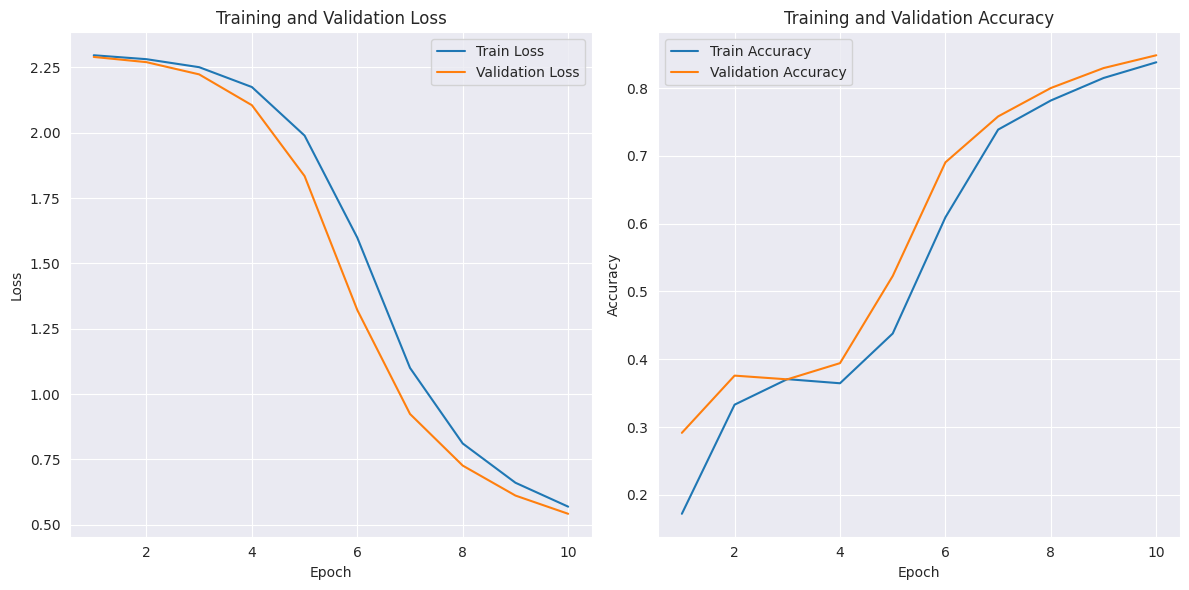

Training with hidden layer: 3 with values: [512, 256, 128]
Epoch 1/10
  Train Loss: 2.2914, Train Accuracy: 0.1237
  Val Loss: 2.2776, Val Accuracy: 0.1822
Epoch 2/10
  Train Loss: 2.2619, Train Accuracy: 0.3187
  Val Loss: 2.2353, Val Accuracy: 0.4044
Epoch 3/10
  Train Loss: 2.1915, Train Accuracy: 0.4012
  Val Loss: 2.1233, Val Accuracy: 0.4087
Epoch 4/10
  Train Loss: 2.0035, Train Accuracy: 0.4862
  Val Loss: 1.8373, Val Accuracy: 0.5612
Epoch 5/10
  Train Loss: 1.5729, Train Accuracy: 0.6341
  Val Loss: 1.2627, Val Accuracy: 0.6981
Epoch 6/10
  Train Loss: 1.0289, Train Accuracy: 0.7459
  Val Loss: 0.8461, Val Accuracy: 0.7782
Epoch 7/10
  Train Loss: 0.7519, Train Accuracy: 0.7889
  Val Loss: 0.6751, Val Accuracy: 0.8108
Epoch 8/10
  Train Loss: 0.6245, Train Accuracy: 0.8183
  Val Loss: 0.5808, Val Accuracy: 0.8359
Epoch 9/10
  Train Loss: 0.5469, Train Accuracy: 0.8410
  Val Loss: 0.5219, Val Accuracy: 0.8537
Epoch 10/10
  Train Loss: 0.4951, Train Accuracy: 0.8572
  Val Loss:

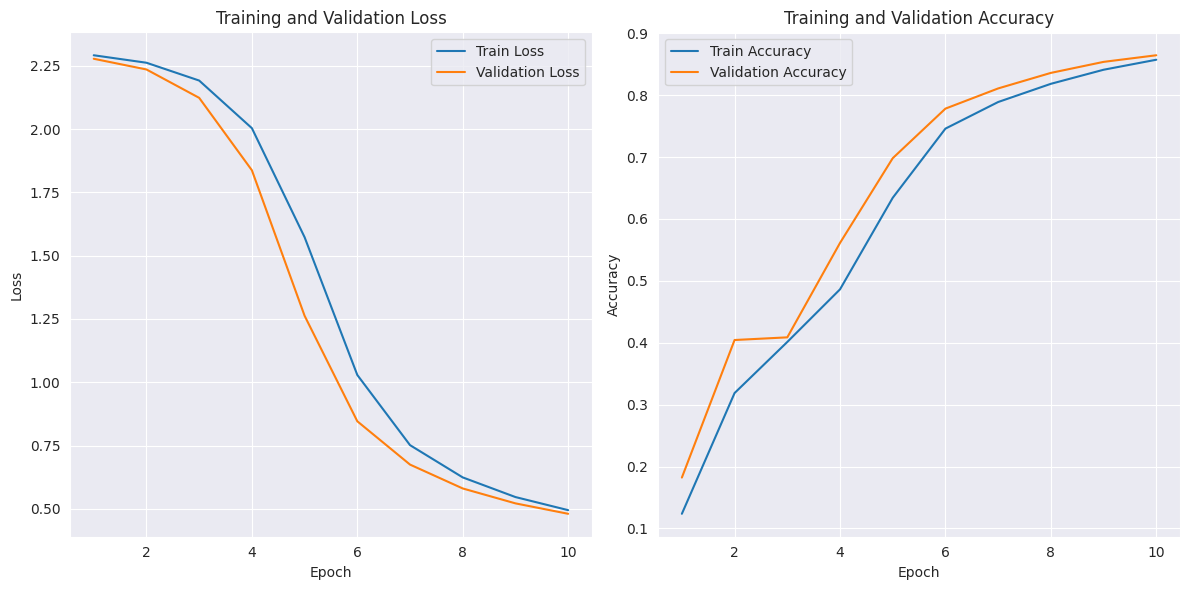

In [9]:
for neuron in neurons:
    mymodel = NeuralNet(neuron)
    criterion =nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(mymodel.parameters(), lr=0.01)
    print(f"Training with hidden layer: {len(neuron)} with values: {neuron}")
    train_losses, val_losses, train_accuracies, val_accuracies = train_mymodel(mymodel, train_loader, val_loader, criterion, optimizer, epochs)
    plot_loss_accuracy(train_losses, val_losses, train_accuracies, val_accuracies)
    
    max_val_accuracy = max(val_accuracies)
    
    # Update the best neuron configuration
    if max_val_accuracy > best_neurons_config["val_accuracy"]:
        best_neurons_config.update({"neurons": neuron, "val_accuracy": max_val_accuracy})
    if max_val_accuracy > combined_best_config["val_accuracy"]:
        combined_best_config.update({"learning_rate": 0.01, "batch_size": 64, "neurons": neuron, "val_accuracy": max(val_accuracies)})



Training and evaluating the best combined model on test set...
Epoch 1/10
  Train Loss: 0.5488, Train Accuracy: 0.8375
  Val Loss: 0.2806, Val Accuracy: 0.9148
Epoch 2/10
  Train Loss: 0.2107, Train Accuracy: 0.9379
  Val Loss: 0.1943, Val Accuracy: 0.9403
Epoch 3/10
  Train Loss: 0.1452, Train Accuracy: 0.9569
  Val Loss: 0.1446, Val Accuracy: 0.9559
Epoch 4/10
  Train Loss: 0.1114, Train Accuracy: 0.9670
  Val Loss: 0.1182, Val Accuracy: 0.9635
Epoch 5/10
  Train Loss: 0.0894, Train Accuracy: 0.9733
  Val Loss: 0.1094, Val Accuracy: 0.9674
Epoch 6/10
  Train Loss: 0.0743, Train Accuracy: 0.9789
  Val Loss: 0.1391, Val Accuracy: 0.9557
Epoch 7/10
  Train Loss: 0.0633, Train Accuracy: 0.9812
  Val Loss: 0.1041, Val Accuracy: 0.9699
Epoch 8/10
  Train Loss: 0.0531, Train Accuracy: 0.9845
  Val Loss: 0.1084, Val Accuracy: 0.9687
Epoch 9/10
  Train Loss: 0.0458, Train Accuracy: 0.9864
  Val Loss: 0.1245, Val Accuracy: 0.9642
Epoch 10/10
  Train Loss: 0.0405, Train Accuracy: 0.9882
  Val 

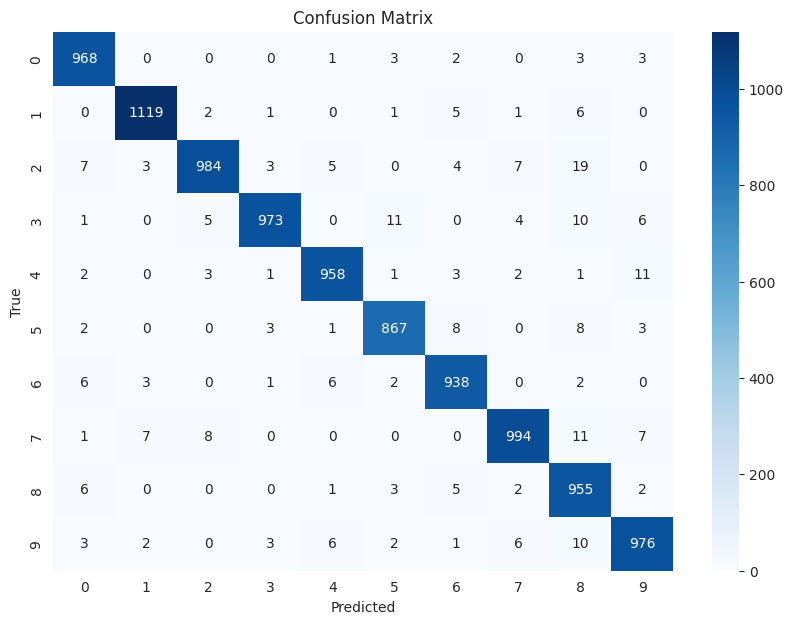


Best Configurations:
  Best Learning Rate: 0.1 (Validation Accuracy: 0.9723)
  Best Batch Size: 32 (Validation Accuracy: 0.9459)
  Best Neurons: [128, 64] (Validation Accuracy: 0.8799)
  Combined Best Configuration: {'learning_rate': 0.1, 'batch_size': 64, 'neurons': [128, 64], 'val_accuracy': 0.9723}


In [13]:
# Re-train and evaluate the final combined best model
print("\nTraining and evaluating the best combined model on test set...")
train_loader = DataLoader(train_dataset, batch_size=combined_best_config["batch_size"], shuffle=True)
mymodel = NeuralNet(combined_best_config["neurons"])  # Initialize the best model
optimizer = torch.optim.SGD(mymodel.parameters(), lr=combined_best_config["learning_rate"])
train_mymodel(mymodel, train_loader, val_loader, criterion, optimizer, epochs)
evaluate_model(mymodel, test_loader)

# Print the best configurations
print("\nBest Configurations:")
print(f"  Best Learning Rate: {best_lr_config['learning_rate']} (Validation Accuracy: {best_lr_config['val_accuracy']:.4f})")
print(f"  Best Batch Size: {best_bs_config['batch_size']} (Validation Accuracy: {best_bs_config['val_accuracy']:.4f})")
print(f"  Best Neurons: {best_neurons_config['neurons']} (Validation Accuracy: {best_neurons_config['val_accuracy']:.4f})")
print(f"  Combined Best Configuration: {combined_best_config}")